## Data reading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('./mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.drop(columns="veil-type", inplace = True)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


## Data pre-processing

###### Encoding data

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#label encoder to convert words into numbers

le = LabelEncoder()
for col in list(data.columns):
    data[col] = le.fit_transform(data[col])

In [5]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.48,0.50,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.35,1.60,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.83,1.23,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.50,2.55,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.42,0.49,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.14,2.10,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.97,0.16,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.16,0.37,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.31,0.46,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.81,3.54,0.0,2.0,5.0,7.0,11.0


###### "Class" is a target column - we have to drop it

In [6]:
X = data.drop('class', axis=1)
y = data['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


###### Prepare data for ML, removing columns which can be confusing for user to set proper values for

In [7]:
X = data.drop(columns=["class", "odor", "gill-attachment", "gill-size","gill-color", 
                       "stalk-root", "stalk-surface-above-ring", 
                       "stalk-surface-below-ring", "stalk-color-above-ring", 
                       "stalk-color-below-ring", "veil-color", "ring-type", 
                       "spore-print-color", "population", "habitat"])

In [8]:
# X = data.drop(["class"], axis=1)
# y = data["class"]
# X = pd.get_dummies(X)

# le = LabelEncoder()
# y = le.fit_transform(y)

In [9]:
X

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,stalk-shape,ring-number
0,5,2,4,1,0,0,1
1,5,2,9,1,0,0,1
2,0,2,8,1,0,0,1
3,5,3,8,1,0,0,1
4,5,2,3,0,1,1,1
...,...,...,...,...,...,...,...
8119,3,2,4,0,0,0,1
8120,5,2,4,0,0,0,1
8121,2,2,4,0,0,0,1
8122,3,3,4,0,0,1,1


In [10]:
from sklearn.model_selection import train_test_split

#Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [11]:
X_train

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,stalk-shape,ring-number
5921,5,2,0,1,0,1,1
1073,5,0,3,1,0,1,1
3710,5,0,3,0,0,0,1
144,5,3,9,1,0,0,1
5469,5,3,4,0,0,1,1
...,...,...,...,...,...,...,...
5226,5,3,4,0,0,1,1
5390,3,3,2,1,0,0,2
860,2,3,4,1,0,0,1
7603,3,2,2,0,0,1,1


In [12]:
X_test

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,stalk-shape,ring-number
1971,2,0,4,0,1,1,1
6654,2,2,2,0,0,1,1
5606,5,3,4,0,0,1,1
3332,2,3,3,1,0,1,1
6988,2,2,2,0,0,1,1
...,...,...,...,...,...,...,...
462,0,2,8,1,0,0,1
1956,5,0,4,0,1,1,1
3781,5,0,3,0,0,0,1
799,5,3,4,1,0,0,1


### Different ML models

In [13]:
from sklearn.model_selection import GridSearchCV

###### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,leaf_size=20, algorithm='kd_tree',p=1).fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_s = accuracy_score(y_test, y_pred)
print('KNN accuracy score for train set is: ', knn.score(X_train, y_train).round(5))

KNN accuracy score for train set is:  0.97819


In [16]:
print('KNN accuracy score for test set is: ', knn.score(X_test, y_test).round(5))

KNN accuracy score for test set is:  0.96308


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 
print("\n Classification report: ")
print(classification_report(y_test, y_pred))

Confusion matrix: 
[[1223   34]
 [  56 1125]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1257
           1       0.97      0.95      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [ ]:
# Looking for best parameters using Grid Search CV

In [22]:
parameters_knn={'n_neighbors':list(range(1,10,1)),
            'leaf_size':list(range(1,101,10)),
           }

In [19]:
model_knn=KNeighborsClassifier()

In [23]:
grid_clf_knn=GridSearchCV(model_knn,parameters_knn,verbose=4,refit=True)

In [24]:
grid_clf_knn.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ........leaf_size=1, n_neighbors=1;, score=0.970 total time=   0.0s
[CV 2/5] END ........leaf_size=1, n_neighbors=1;, score=0.976 total time=   0.0s
[CV 3/5] END ........leaf_size=1, n_neighbors=1;, score=0.974 total time=   0.0s
[CV 4/5] END ........leaf_size=1, n_neighbors=1;, score=0.953 total time=   0.0s
[CV 5/5] END ........leaf_size=1, n_neighbors=1;, score=0.982 total time=   0.0s
[CV 1/5] END ........leaf_size=1, n_neighbors=2;, score=0.969 total time=   0.0s
[CV 2/5] END ........leaf_size=1, n_neighbors=2;, score=0.978 total time=   0.0s
[CV 3/5] END ........leaf_size=1, n_neighbors=2;, score=0.978 total time=   0.0s
[CV 4/5] END ........leaf_size=1, n_neighbors=2;, score=0.953 total time=   0.0s
[CV 5/5] END ........leaf_size=1, n_neighbors=2;, score=0.981 total time=   0.0s
[CV 1/5] END ........leaf_size=1, n_neighbors=3;, score=0.966 total time=   0.0s
[CV 2/5] END ........leaf_size=1, n_neighbors=3

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=4)

In [26]:
clf_knn=grid_clf_knn.best_estimator_
print(clf_knn)

KNeighborsClassifier(leaf_size=1, n_neighbors=4)


###### SVC

In [27]:
from sklearn.svm import SVC

svc = SVC(kernel='linear' ).fit(X_train , y_train)
svc_s = accuracy_score(y_test,y_pred)
print('SVC accuracy score for train set is: ', svc.score(X_train,y_train).round(5))

SVC accuracy score for train set is:  0.86898


In [28]:
y_pred = svc.predict(X_test)
print('SVC accuracy score for test set is: ', svc.score(X_test,y_test).round(5))

SVC accuracy score for test set is:  0.86259


In [29]:
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 
print("\n Classification report: ")
print(classification_report(y_test, y_pred))

Confusion matrix: 
[[1151  106]
 [ 229  952]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1257
           1       0.90      0.81      0.85      1181

    accuracy                           0.86      2438
   macro avg       0.87      0.86      0.86      2438
weighted avg       0.87      0.86      0.86      2438



In [ ]:
# Looking for best parameters using Grid Search CV

In [31]:
parameters_svc={'gamma':['scale', 'auto'],
            'C':list(range(1,10,1)),
           }

In [32]:
model_svc=SVC(kernel='rbf')

In [34]:
grid_clf_svc=GridSearchCV(model_svc,parameters_svc,verbose=4,refit=True)

In [35]:
grid_clf_svc.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..................C=1, gamma=scale;, score=0.912 total time=   0.4s
[CV 2/5] END ..................C=1, gamma=scale;, score=0.889 total time=   0.4s
[CV 3/5] END ..................C=1, gamma=scale;, score=0.892 total time=   0.5s
[CV 4/5] END ..................C=1, gamma=scale;, score=0.897 total time=   0.4s
[CV 5/5] END ..................C=1, gamma=scale;, score=0.891 total time=   0.4s
[CV 1/5] END ...................C=1, gamma=auto;, score=0.969 total time=   0.2s
[CV 2/5] END ...................C=1, gamma=auto;, score=0.963 total time=   0.2s
[CV 3/5] END ...................C=1, gamma=auto;, score=0.953 total time=   0.2s
[CV 4/5] END ...................C=1, gamma=auto;, score=0.962 total time=   0.2s
[CV 5/5] END ...................C=1, gamma=auto;, score=0.964 total time=   0.2s
[CV 1/5] END ..................C=2, gamma=scale;, score=0.913 total time=   0.4s
[CV 2/5] END ..................C=2, gamma=scale;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': ['scale', 'auto']},
             verbose=4)

In [36]:
clf_svc=grid_clf_svc.best_estimator_
print(clf_svc)

SVC(C=8, gamma='auto')


###### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=4 , min_samples_leaf=3).fit(X_train,y_train)
dec_s = accuracy_score(y_test,y_pred)
print('Decision Tree accuracy score for train set is: ',dec.score(X_train,y_train).round(5))

Decision Tree accuracy score for train set is:  0.89624


In [38]:
y_pred = dec.predict(X_test)
print('Decision Tree accuracy score for test set is: ', dec.score(X_test , y_test).round(5))

Decision Tree accuracy score for test set is:  0.88597


In [39]:
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 
print("\n Classification report: ")
print(classification_report(y_test, y_pred))

Confusion matrix: 
[[1153  104]
 [ 174 1007]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1257
           1       0.91      0.85      0.88      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.88      0.89      2438
weighted avg       0.89      0.89      0.89      2438



In [40]:
# Looking for best parameters using Grid Search CV

In [41]:
parameters_dt={'max_depth':list(range(1,101,5)),
            'min_samples_leaf':list(range(1,20,1)),
           }

In [43]:
model_dt=DecisionTreeClassifier()

In [44]:
grid_clf_dt=GridSearchCV(model_dt,parameters_dt,verbose=4,refit=True)

In [45]:
grid_clf_dt.fit(X_train,y_train)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV 1/5] END ...max_depth=1, min_samples_leaf=1;, score=0.757 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=1;, score=0.737 total time=   0.0s
[CV 3/5] END ...max_depth=1, min_samples_leaf=1;, score=0.755 total time=   0.0s
[CV 4/5] END ...max_depth=1, min_samples_leaf=1;, score=0.746 total time=   0.0s
[CV 5/5] END ...max_depth=1, min_samples_leaf=1;, score=0.742 total time=   0.0s
[CV 1/5] END ...max_depth=1, min_samples_leaf=2;, score=0.757 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf=2;, score=0.737 total time=   0.0s
[CV 3/5] END ...max_depth=1, min_samples_leaf=2;, score=0.755 total time=   0.0s
[CV 4/5] END ...max_depth=1, min_samples_leaf=2;, score=0.746 total time=   0.0s
[CV 5/5] END ...max_depth=1, min_samples_leaf=2;, score=0.742 total time=   0.0s
[CV 1/5] END ...max_depth=1, min_samples_leaf=3;, score=0.757 total time=   0.0s
[CV 2/5] END ...max_depth=1, min_samples_leaf

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51,
                                       56, 61, 66, 71, 76, 81, 86, 91, 96],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=4)

In [46]:
clf_dt=grid_clf_dt.best_estimator_
print(clf_dt)

DecisionTreeClassifier(max_depth=11)


###### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(max_depth=8 , n_estimators=20 , min_samples_leaf=3).fit(X_train,y_train)
rand_s = accuracy_score(y_test,y_pred)
print('Random Forest accuracy score for train set is: ', rand.score(X_train,y_train).round(5))

Random Forest accuracy score for train set is:  0.97362


In [48]:
y_pred = rand.predict(X_test)
print('Random Forest accuracy score for test set is: ', rand.score(X_test,y_test).round(5))

Random Forest accuracy score for test set is:  0.9598


In [49]:
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred)) 
print("\n Classification report: ")
print(classification_report(y_test, y_pred))

Confusion matrix: 
[[1224   33]
 [  65 1116]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1257
           1       0.97      0.94      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [50]:
# Looking for best parameters using Grid Search CV

In [51]:
parameters_rf={'max_depth':list(range(1,101,5)),
            'n_estimators':list(range(1,20,1)),
           }

In [53]:
model_rf=RandomForestClassifier()

In [55]:
grid_clf_rf=GridSearchCV(model_rf,parameters_rf,verbose=4,refit=True)

In [56]:
grid_clf_rf.fit(X_train,y_train)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV 1/5] END .......max_depth=1, n_estimators=1;, score=0.757 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators=1;, score=0.737 total time=   0.0s
[CV 3/5] END .......max_depth=1, n_estimators=1;, score=0.532 total time=   0.0s
[CV 4/5] END .......max_depth=1, n_estimators=1;, score=0.746 total time=   0.0s
[CV 5/5] END .......max_depth=1, n_estimators=1;, score=0.519 total time=   0.0s
[CV 1/5] END .......max_depth=1, n_estimators=2;, score=0.547 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators=2;, score=0.771 total time=   0.0s
[CV 3/5] END .......max_depth=1, n_estimators=2;, score=0.631 total time=   0.0s
[CV 4/5] END .......max_depth=1, n_estimators=2;, score=0.746 total time=   0.0s
[CV 5/5] END .......max_depth=1, n_estimators=2;, score=0.858 total time=   0.0s
[CV 1/5] END .......max_depth=1, n_estimators=3;, score=0.757 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51,
                                       56, 61, 66, 71, 76, 81, 86, 91, 96],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             verbose=4)

In [57]:
clf_rf=grid_clf_rf.best_estimator_
print(clf_rf)

RandomForestClassifier(max_depth=51, n_estimators=9)


### Chart summarizing accuracies in each model

Text(0.5, 1.0, 'Plotting the Model Accuracies')

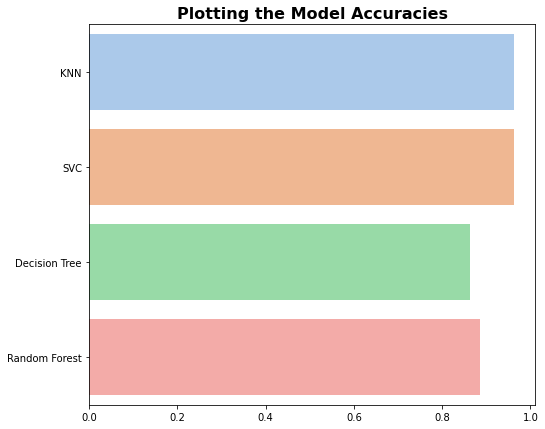

In [58]:
plt.figure(figsize= (8,7))
ac = [knn_s,svc_s,dec_s,rand_s]
name = ['KNN','SVC','Decision Tree','Random Forest']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder

###### Logistic Regression

In [60]:
clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test, predicted),3)))
print("Precision score is: " + str(round(precision_score(y_test, predicted),3)))
print("F1 score is: " + str(round(f1_score(y_test, predicted),3)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 0.8584615384615385
Recall score is: 0.798
Precision score is: 0.906
F1 score is: 0.848

Confusion matrix:
[[752  67]
 [163 643]]


###### Top 20 features

Text(0.5, 1.0, 'Classification - TOP20 features (importance)')

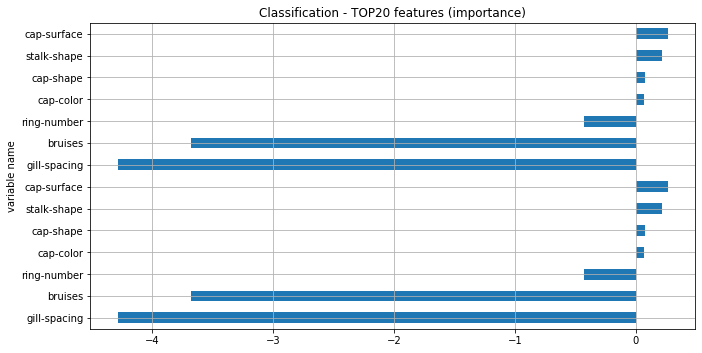

In [62]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")